In [21]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import nltk
import pandas as pd
import TraverseDir.TraverseDir as td
import pandas_toolkit.mytoolkit as tk
from scipy.signal import find_peaks
import scipy.signal

In [3]:
rootDir = '/Users/wangmu/Documents/Science/mG1/数据/sec'

In [4]:
file_path_list = td.show_all_path(rootDir)
file_name_list = td.get_filename(file_path_list)

In [5]:
#overview alldata in rootDir
print('length is: '+f'{len(file_name_list)}')
print('type is: '+f"{type(file_name_list)}")

length is: 8193
type is: <class 'list'>


In [6]:
# make data list[('name',pandas.df),...]
data_list = []
for finame,fipath in zip(file_name_list,file_path_list):
    data_pair= (finame,tk.onestep_norm_peak2zero(fipath),tk.onestep_norm_peak2max(fipath))
    data_list.append(data_pair)

ss = data_list
#SS :[(filename:str,peak2zero:pandas.df,peak2max:pandas.df)]

In [7]:
#overview alldata in ss

print('length is: '+f'{len(ss)}')
print('type is: '+f"{type(ss)}")

length is: 8193
type is: <class 'list'>


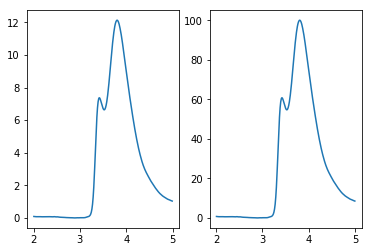

In [8]:
# single seq find peak width

tdata = ss[200]
fig,axs=plt.subplots(1,2)

axs[0].plot(tdata[1].time,tdata[1].peak)
axs[1].plot(tdata[2].time,tdata[2].peak)
plt.show()

In [9]:
# show figsize
matplotlib.rcParams["figure.figsize"]
# change size

[6.0, 4.0]

In [23]:
# a dict recorded all params
matplotlib.rcParams

/Users/wangmu/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

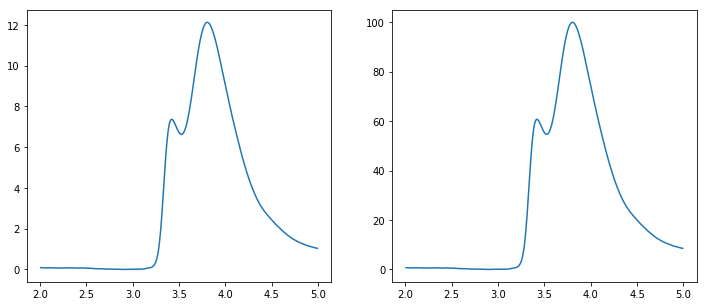

In [24]:
# change fig size

tdata = ss[200]
fig,axs=plt.subplots(1,2)

axs[0].plot(tdata[1].time,tdata[1].peak)
axs[1].plot(tdata[2].time,tdata[2].peak)
matplotlib.rcParams["figure.figsize"] = [12.0,5.0]
plt.show()

In [26]:
# find peaks:input a Series a return peak index
peaks,param = find_peaks(tdata[1].peak)

In [27]:
peaks

array([315, 332, 341, 349, 354, 366, 376, 391, 422, 441, 450, 513, 570])

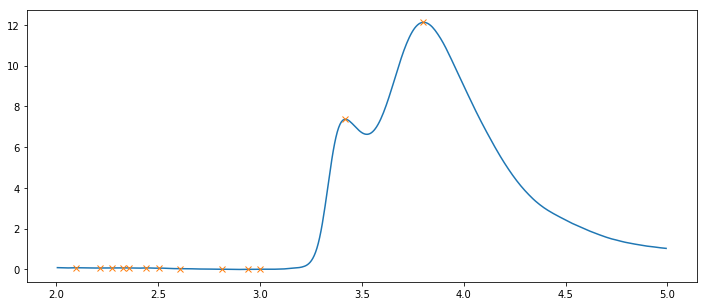

In [12]:
#show peak position as 'x'
plt.plot(tdata[1].time,tdata[1].peak)
plt.plot(tdata[1].time[peaks],tdata[1].peak[peaks],"x")
plt.show()

In [48]:
# 找出峰高最高的两个数值
# 找出序列中最大的n个数值
# numpy.argsort(a, axis=-1, kind='quicksort', order=None)[source]¶
# Returns the indices that would sort an array.
# 返回一个index的array。index的顺序即为index对应value的由小到大的排列顺序

# n = 1
# print (x[np.argsort(x)[-n:]])

In [14]:
# 找出峰高最高的两个数值：找出df peak
sele_peak=tdata[1].peak[peaks]
sele_peak

315     0.082970
332     0.072002
341     0.076771
349     0.077724
354     0.074387
366     0.077248
376     0.066280
391     0.042439
422     0.013351
441     0.010014
450     0.012875
513     7.370949
570    12.128353
Name: peak, dtype: float64

In [15]:
# 找出峰高最高的两个数值：最大2个 peak数值,max顺序为数值降序

n=2
max2=sele_peak.values[np.argsort(sele_peak)[-n:][::-1]]
max2 #array

array([12.12835312,  7.37094879])

In [16]:
# useless
sele_peak.index[sele_peak==12.12835312]

Int64Index([570], dtype='int64')

In [17]:
#useless
ind =sele_peak[[570,513]]
ind
#sele_peak[ind]


570    12.128353
513     7.370949
Name: peak, dtype: float64

In [18]:
# make index list
index_list=[]
for i in max2:
    index_list.append(sele_peak.index[sele_peak==i][0])
print(index_list)


[570, 513]


In [19]:
# show max2 sele Series
print(sele_peak[index_list])
print(type(sele_peak[index_list]))


570    12.128353
513     7.370949
Name: peak, dtype: float64
<class 'pandas.core.series.Series'>


In [126]:
# 以上得到了：最高的两个峰及对应index，可以进一步得到对应的出峰时间，接下来要得到峰宽

In [127]:
# 之后可以得到不止3d的特征向量

In [129]:
# input pandas.df\maxn(optional)
# output:([index_list],array[max_peak_list],array[prominences],)
def df2feature_vector(df:'pandas.dataframe',maxn:int=2):
    '''
    need: <from scipy.signal import find_peaks> ,numpy,pandas
    maxn:number of max values you want
    '''
    # find peaks,return peaks's index array
    peaks_found,param = scipy.signal.find_peaks(df.peak)
    # pick peaks' <.peak> from df by peaks_found
    sele_peak=df.peak[peaks_found]
    # pick max value from pd.Series sele_peak,max顺序为数值降序
    max_array=sele_peak.values[np.argsort(sele_peak)[-n:][::-1]]
    # make index list
    index_list=[]
    for i in max:
        index_list.append(sele_peak.index[sele_peak==i][0])
    # get prominences:list
    prominences = scipy.signal.peak_prominences(df.peak,index_list)[0] # prominences has 3 arraies,use first 
    
    


Object ` process` not found.


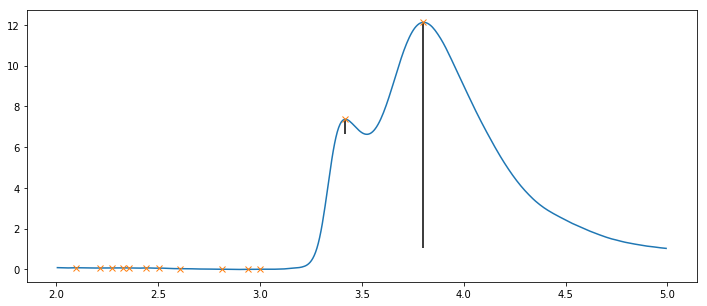

In [63]:
#show peak position as 'x'
x = tdata[1]
peaks,param = find_peaks(x.peak)
# get prominences
prominences = scipy.signal.peak_prominences(tdata[1].peak,peaks)[0] # prominences has 3 arraies,use first 
# get half width,full width
results_half = peak_widths(x, peaks, rel_height=0.5)
results_full = peak_widths(x, peaks, rel_height=1)

contour_heights = tdata[1].peak[peaks]-prominences
plt.plot(tdata[1].time,tdata[1].peak)
plt.plot(tdata[1].time[peaks],tdata[1].peak[peaks],"x")
plt.vlines(x=tdata[1].time[peaks], ymin=contour_heights, ymax=tdata[1].peak[peaks])
plt.show()

# 成功，可以替换成 max peak

In [64]:
prominences

array([8.58306900e-03, 1.90734800e-03, 2.38418600e-03, 8.58306900e-03,
       4.76837000e-04, 1.33514400e-02, 3.33786100e-03, 1.90734900e-03,
       2.86102300e-03, 4.29153500e-03, 7.62939500e-03, 7.38143921e-01,
       1.10945702e+01])

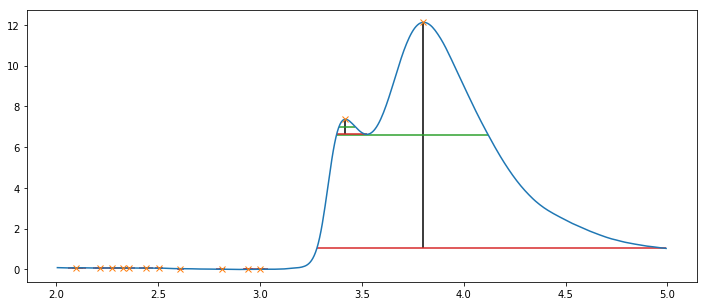

In [107]:
#show peak position as 'x'
tdata = ss[200]
x = tdata[1]
peaks,param = find_peaks(x.peak)
# get prominences
prominences = scipy.signal.peak_prominences(x.peak,peaks)[0] # prominences has 3 arraies,use first 
# get half width,full width
results_half = scipy.signal.peak_widths(x.peak, peaks, rel_height=0.5)
results_full = scipy.signal.peak_widths(x.peak, peaks, rel_height=1)
# calculation about width.
# x axis is value .time. But results_half returns indexs of .time,with which we calculate width.
# width_coefficient*results_half[0] returns what we see in the plot.
index_x_max=x.time.index[x.time==x.time.max()][0]
index_x_min=x.time.index[x.time==x.time.min()][0]
index_length = index_x_max-index_x_min
width_coefficient=(x.time.max()-x.time.min())/index_length


contour_heights = x.peak[peaks]-prominences
plt.plot(x.time,tdata[1].peak)
plt.plot(x.time[peaks],x.peak[peaks],"x")
plt.vlines(x=x.time[peaks], ymin=contour_heights, ymax=x.peak[peaks])
plt.hlines(y=results_half[1],
           xmin=width_coefficient*results_half[2],
           xmax=width_coefficient*results_half[3],
           color="C2")
plt.hlines(y=results_full[1],
           xmin=width_coefficient*results_full[2],
           xmax=width_coefficient*results_full[3], 
           color="C3")
plt.show()

# 成功，可以替换成 max peak

In [75]:
results_half

(array([  7.86666668,   3.        ,   2.58333421,  16.70000065,
          1.        ,   5.24999993,   3.87499993,   2.99999895,
          3.9999986 ,   3.93333341,   6.20000034,  12.02615262,
        111.89979308]),
 array([0.07867813, 0.07104874, 0.07557869, 0.07343292, 0.07414818,
        0.0705719 , 0.06461143, 0.04148483, 0.01192093, 0.00786781,
        0.00905991, 7.00187683, 6.58106804]),
 array([311.79999987, 331.        , 340.16666632, 338.79999987,
        353.5       , 363.75000007, 374.25      , 390.00000052,
        420.00000105, 438.90000004, 447.79999987, 508.24411765,
        506.35117968]),
 array([319.66666655, 334.        , 342.75000052, 355.50000052,
        354.5       , 369.        , 378.12499993, 392.99999948,
        423.99999965, 442.83333345, 454.00000021, 520.27027027,
        618.25097276]))

In [73]:
x.time[results_half[2]]

311.800000         NaN
331.000000    2.206667
340.166666         NaN
338.800000         NaN
353.500000         NaN
363.750000         NaN
374.250000         NaN
390.000001         NaN
420.000001         NaN
438.900000         NaN
447.800000         NaN
508.244118         NaN
506.351180         NaN
Name: time, dtype: float64

In [76]:
peaks

array([315, 332, 341, 349, 354, 366, 376, 391, 422, 441, 450, 513, 570])

In [77]:
prominences

array([8.58306900e-03, 1.90734800e-03, 2.38418600e-03, 8.58306900e-03,
       4.76837000e-04, 1.33514400e-02, 3.33786100e-03, 1.90734900e-03,
       2.86102300e-03, 4.29153500e-03, 7.62939500e-03, 7.38143921e-01,
       1.10945702e+01])

In [89]:
len(x.time[])

SyntaxError: invalid syntax (<ipython-input-89-8f66c08a72c3>, line 1)

In [83]:
x.time.max()

4.993333333

In [84]:
x.time.min()

2.0066666669999997

In [ ]:
(x.time.max()-x.time.min())/len(x.time)*

In [92]:
x.time.index[x.time==x.time.max()][0]

749

In [100]:
width_coefficient*results_half[0]

array([0.05244444, 0.02      , 0.01722223, 0.11133334, 0.00666667,
       0.035     , 0.02583333, 0.01999999, 0.02666666, 0.02622222,
       0.04133334, 0.08017435, 0.74599862])

In [101]:
width_coefficient*results_full[0]

array([0.08833333, 0.04      , 0.03111111, 0.20777778, 0.01333333,
       0.06888889, 0.04      , 0.03333333, 0.044     , 0.04666667,
       0.12133333, 0.14967937, 1.71363709])

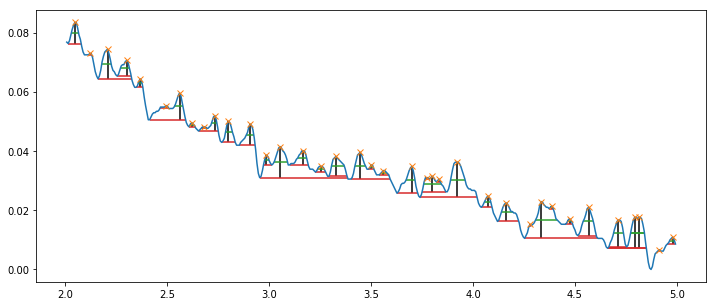

In [106]:
#show peak position as 'x'
tdata = ss[0]
x = tdata[1]
peaks,param = find_peaks(x.peak)
# get prominences
prominences = scipy.signal.peak_prominences(x.peak,peaks)[0] # prominences has 3 arraies,use first 
# get half width,full width
results_half = scipy.signal.peak_widths(x.peak, peaks, rel_height=0.5)
results_full = scipy.signal.peak_widths(x.peak, peaks, rel_height=1)
# calculation about width.
# x axis is value .time. But results_half returns indexs of .time,with which we calculate width.
# width_coefficient*results_half[0] returns what we see in the plot.
index_x_max=x.time.index[x.time==x.time.max()][0]
index_x_min=x.time.index[x.time==x.time.min()][0]
index_length = index_x_max-index_x_min
width_coefficient=(x.time.max()-x.time.min())/index_length


contour_heights = x.peak[peaks]-prominences
plt.plot(x.time,tdata[1].peak)
plt.plot(x.time[peaks],x.peak[peaks],"x")
plt.vlines(x=x.time[peaks], ymin=contour_heights, ymax=x.peak[peaks])
plt.hlines(y=results_half[1],
           xmin=width_coefficient*results_half[2],
           xmax=width_coefficient*results_half[3],
           color="C2")
plt.hlines(y=results_full[1],
           xmin=width_coefficient*results_full[2],
           xmax=width_coefficient*results_full[3], 
           color="C3")
plt.show()

# 成功，可以替换成 max peak